## Predicting the Loan Status using Machine learning

### ---------------------------------------------------------------------------------------------------------------------------------------------------------

## <u><strong>Importing Data Set</strong></u>

In [458]:
### importing libraries 

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

%matplotlib inline
sns.set_theme(style="darkgrid")

In [459]:
data=pd.read_csv(r'A:\DS ML\Loan Prediciton\train_u6lujuX_CVtuZ9i.csv')

## <u><strong> Data Analysis </strong></u>

In [460]:
data.sample(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
236,LP001786,Male,Yes,0,Graduate,NaN,5746,0.0,255.0,360.0,NaN,Urban,N
553,LP002788,Male,Yes,0,Not Graduate,No,2454,2333.0,181.0,360.0,0.0,Urban,N
193,LP001658,Male,No,0,Graduate,No,3858,0.0,76.0,360.0,1.0,Semiurban,Y
578,LP002877,Male,Yes,1,Graduate,No,1782,2232.0,107.0,360.0,1.0,Rural,Y
441,LP002409,Male,Yes,0,Graduate,No,7901,1833.0,180.0,360.0,1.0,Rural,Y


In [461]:
print(f'Number of Rows and Columns :{data.shape}')

Number of Rows and Columns :(614, 13)


In [462]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [463]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [464]:
cat_cols=[col for col in data.columns if data[col].dtype=='O']
num_cols=[col for col in data.columns if data[col].dtype!='O']

In [465]:
print(f'Number of Categorical Columns : {len(cat_cols)}')
print(' ')
print(f'Number of Numerical Columns : {len(num_cols)}')

Number of Categorical Columns : 8
 
Number of Numerical Columns : 5


In [466]:
d={}
l=[]
l1=[]
for i in data.columns:
    d[i]=data[i].unique()
    l.append(data[i].nunique())
    l1.append(data[i].isna().sum())
    
data_info=pd.DataFrame(data=d.items(),columns=['Featues','Unique_records'])

In [467]:
data_info['no_of_unique_records']=pd.Series(l)
data_info['no_of_missing_records']=pd.Series(l1)
data_info['%_of_missing_records']=round((data_info['no_of_missing_records']/len(data))*100,2)

In [468]:
data_info

,Featues,Unique_records,no_of_unique_records,no_of_missing_records,%_of_missing_records
0,Loan_ID,"[LP001002, LP001003, LP001005, LP001006, LP001...",614,0,0.00
1,Gender,"[Male, Female, nan]",2,13,2.12
2,Married,"[No, Yes, nan]",2,3,0.49
3,Dependents,"[0, 1, 2, 3+, nan]",4,15,2.44
4,Education,"[Graduate, Not Graduate]",2,0,0.00
5,Self_Employed,"[No, Yes, nan]",2,32,5.21
6,ApplicantIncome,"[5849, 4583, 3000, 2583, 6000, 5417, 2333, 303...",505,0,0.00
7,CoapplicantIncome,"[0.0, 1508.0, 2358.0, 4196.0, 1516.0, 2504.0, ...",287,0,0.00
8,LoanAmount,"[nan, 128.0, 66.0, 120.0, 141.0, 267.0, 95.0, ...",203,22,3.58
9,Loan_Amount_Term,"[360.0, 120.0, 240.0, nan, 180.0, 60.0, 300.0,...",10,14,2.28


In [469]:
## Makin copy of the data
df=data.copy()

## --------------------------------------------------------------------------------------------------------------------

## <u><strong>Data Vizualization</u><strong>

<AxesSubplot:ylabel='Gender'>

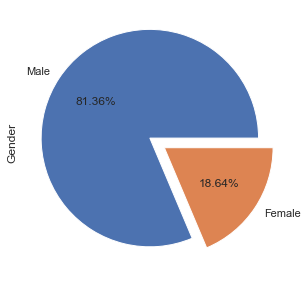

In [470]:
plt.figure(figsize=(8,5))
df['Gender'].value_counts().plot.pie(autopct="%.2f%%",explode=[0.08]*2)

<AxesSubplot:ylabel='Married'>

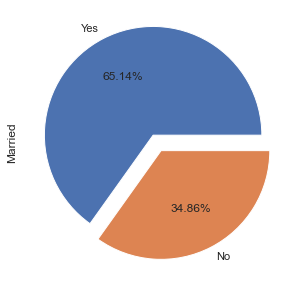

In [471]:
plt.figure(figsize=(8,5))
df['Married'].value_counts().plot.pie(autopct="%.2f%%",explode=[0.08]*2)

<AxesSubplot:xlabel='Dependents', ylabel='count'>

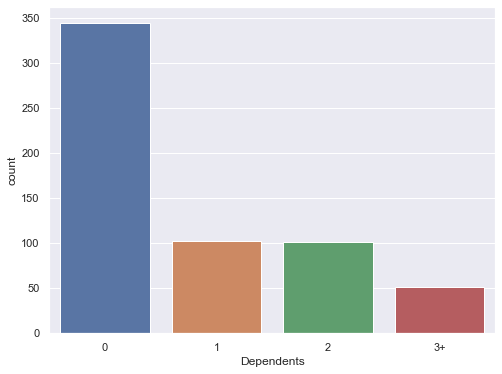

In [472]:
plt.figure(figsize=(8,6))
sns.countplot(x='Dependents',data=df)

<AxesSubplot:ylabel='Education'>

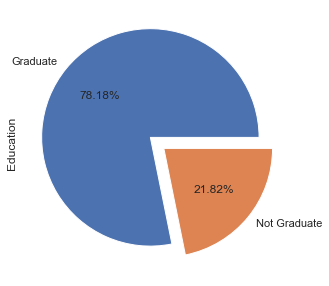

In [473]:
plt.figure(figsize=(8,5))
df['Education'].value_counts().plot.pie(autopct="%.2f%%",explode=[0.08]*2)

<AxesSubplot:ylabel='Self_Employed'>

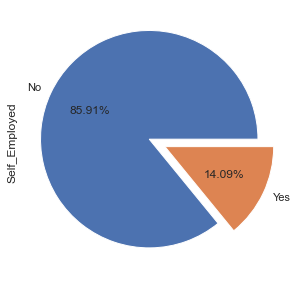

In [474]:
plt.figure(figsize=(8,5))
df['Self_Employed'].value_counts().plot.pie(autopct="%.2f%%",explode=[0.08]*2)

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

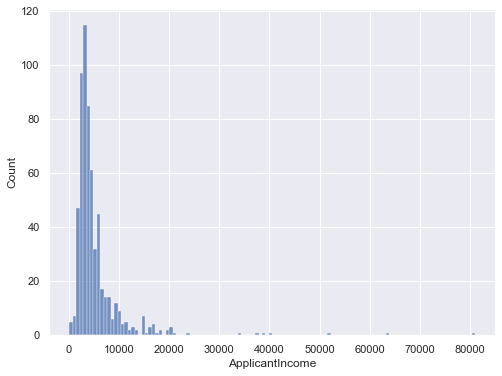

In [475]:
plt.figure(figsize=(8,6))
sns.histplot(x=df['ApplicantIncome'])

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

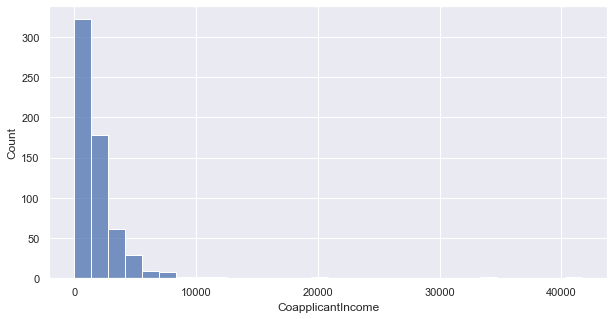

In [476]:
plt.figure(figsize=(10,5))
sns.histplot(x=df['CoapplicantIncome'],bins=30)

C:\Users\Chauh\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

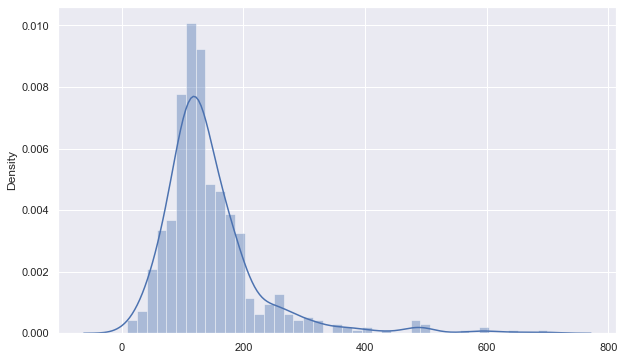

In [477]:
plt.figure(figsize=(10,6))
sns.distplot(x=df['LoanAmount'])

<AxesSubplot:ylabel='Credit_History'>

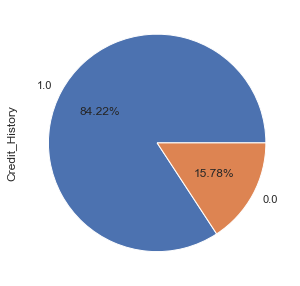

In [478]:
plt.figure(figsize=(8,5))
df['Credit_History'].value_counts().plot.pie(autopct="%.2f%%")

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='count'>

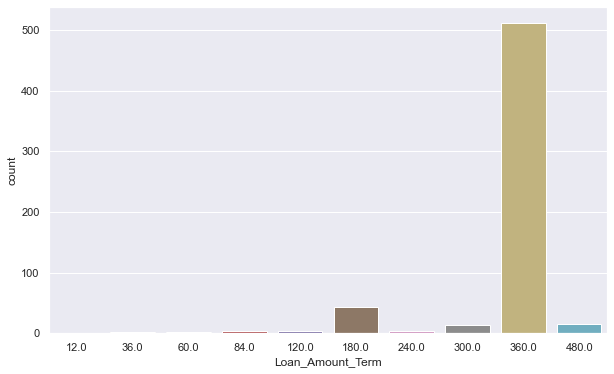

In [479]:
plt.figure(figsize=(10,6))
sns.countplot(x='Loan_Amount_Term',data=df)

<AxesSubplot:ylabel='Property_Area'>

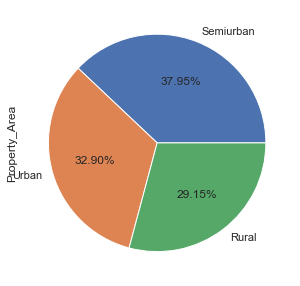

In [480]:
plt.figure(figsize=(8,5))
df['Property_Area'].value_counts().plot.pie(autopct="%.2f%%")

<AxesSubplot:ylabel='Loan_Status'>

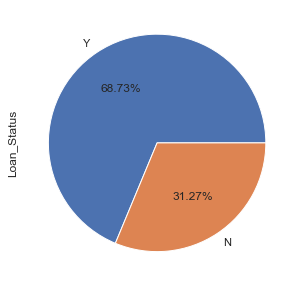

In [481]:
plt.figure(figsize=(8,5))
df['Loan_Status'].value_counts().plot.pie(autopct="%.2f%%")

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## <u><em> Insights from Uni Variate Analysis</u></em>:

### >In Maximum number of application for loan `Males` are the Primary Applicant
### >People who are `married` tend to `apply more` for Loan
### >Most of the applicant has `no dependent`
### >Approx `80%` of the applicant are `Graduate`
### >Most of the applicant are `salaried` 
### >Most of the Applicant has `income<10K`
### >Maximum People's coapplicant doesn't have a source of income 
### >Maximum number of applicant apply for `100k-180k` Loan Amount
### >Maximum people has Credit score of `1`
### >People mostly take loan for almost a `Year` i.e.365 days
### >Maximum number of Loan application comes from `Semi-urban` Area 

### --------------------------------------------------------------------------------------------------------------------------------------------------------------


## <u><strong>Bi Variate Analysis</strong></u>

<AxesSubplot:xlabel='Gender', ylabel='count'>

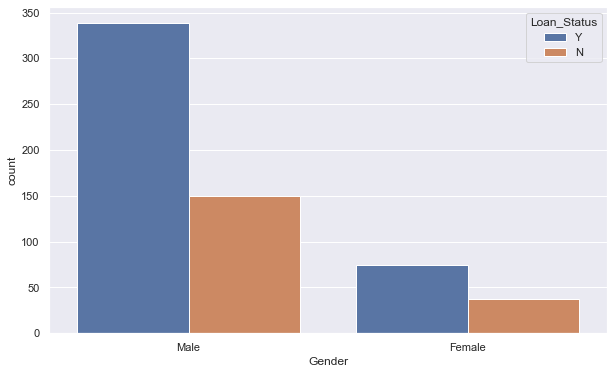

In [482]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=df,hue='Loan_Status')

In [483]:
df.groupby('Gender')['Loan_Status'].value_counts()

Gender  Loan_Status
Female  Y               75
        N               37
Male    Y              339
        N              150
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Married', ylabel='count'>

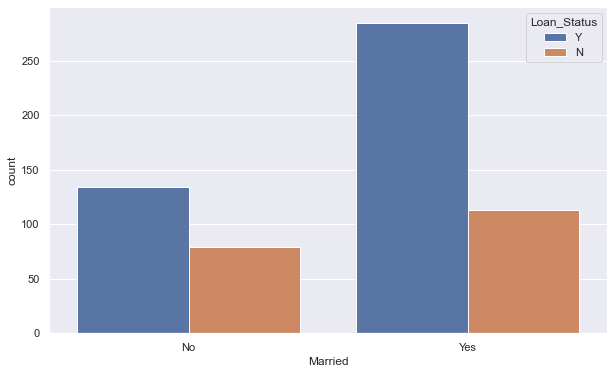

In [484]:
plt.figure(figsize=(10,6))
sns.countplot(x='Married',data=df,hue='Loan_Status')

In [485]:
df.groupby('Married')['Loan_Status'].value_counts()

Married  Loan_Status
No       Y              134
         N               79
Yes      Y              285
         N              113
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Dependents', ylabel='count'>

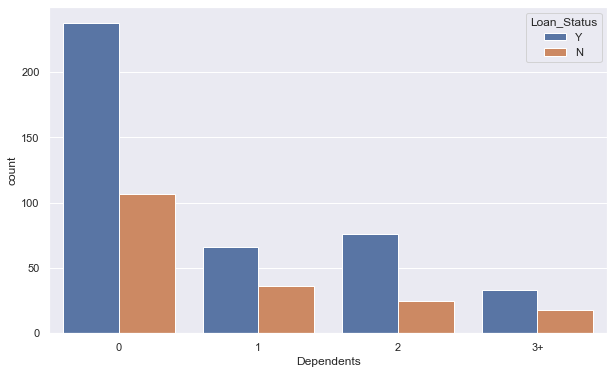

In [486]:
plt.figure(figsize=(10,6))
sns.countplot(x='Dependents',data=df,hue='Loan_Status')

In [487]:
df.groupby('Dependents')['Loan_Status'].value_counts()

Dependents  Loan_Status
0           Y              238
            N              107
1           Y               66
            N               36
2           Y               76
            N               25
3+          Y               33
            N               18
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

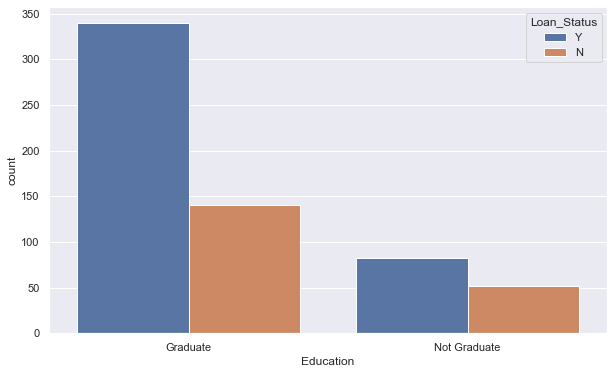

In [488]:
plt.figure(figsize=(10,6))
sns.countplot(x='Education',data=df,hue='Loan_Status')

In [489]:
df.groupby('Education')['Loan_Status'].value_counts()

Education     Loan_Status
Graduate      Y              340
              N              140
Not Graduate  Y               82
              N               52
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

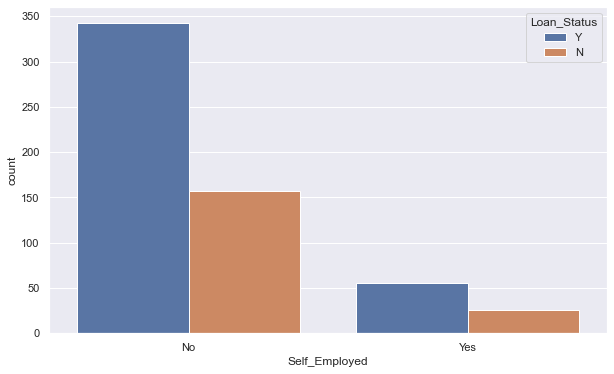

In [490]:
plt.figure(figsize=(10,6))
sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')

In [491]:
df.groupby('Self_Employed')['Loan_Status'].value_counts()

Self_Employed  Loan_Status
No             Y              343
               N              157
Yes            Y               56
               N               26
Name: Loan_Status, dtype: int64

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

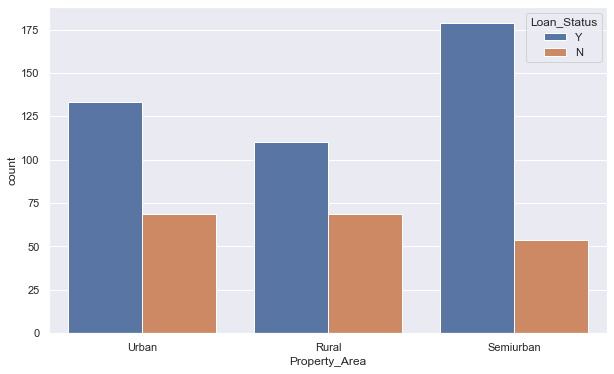

In [492]:
plt.figure(figsize=(10,6))
sns.countplot(x='Property_Area',data=df,hue='Loan_Status')

In [493]:
df.groupby('Loan_Status')['Property_Area'].value_counts()

Loan_Status  Property_Area
N            Rural             69
             Urban             69
             Semiurban         54
Y            Semiurban        179
             Urban            133
             Rural            110
Name: Property_Area, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='LoanAmount'>

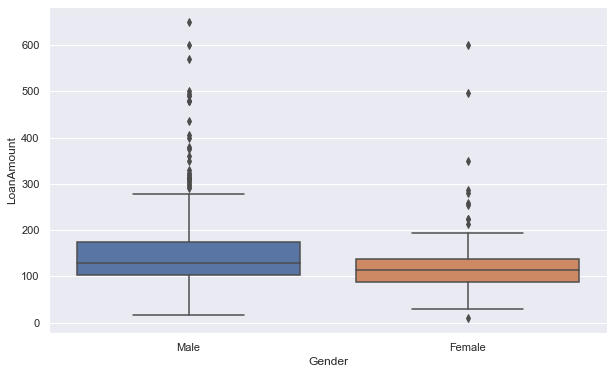

In [494]:
plt.figure(figsize=(10,6))
sns.boxplot(y='LoanAmount',x='Gender',data=df)

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

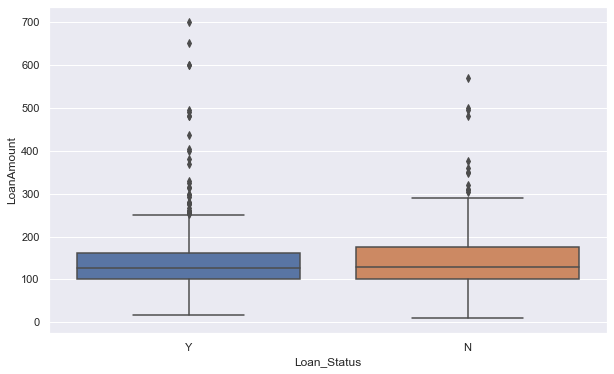

In [495]:
plt.figure(figsize=(10,6))
sns.boxplot(y='LoanAmount',x='Loan_Status',data=df)

<AxesSubplot:xlabel='Gender', ylabel='ApplicantIncome'>

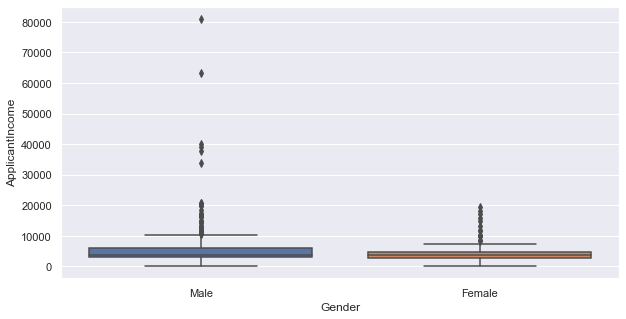

In [496]:
plt.figure(figsize=(10,5))
sns.boxplot(y='ApplicantIncome',x='Gender',data=df)

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

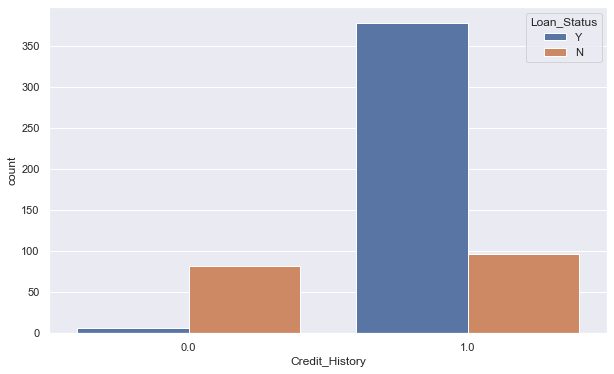

In [497]:
plt.figure(figsize=(10,6))
sns.countplot(x='Credit_History',data=df,hue='Loan_Status')

In [498]:
df.groupby('Credit_History')['Loan_Status'].value_counts()

Credit_History  Loan_Status
0.0             N               82
                Y                7
1.0             Y              378
                N               97
Name: Loan_Status, dtype: int64

### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## <u><em> Key Points: </em></u>

### >Loan request acceptance rate for `Male :(69.32%)` and for `Female :(66.96%)`.
### Loan request acceptance rate for `Married is (71.6%)` and for `Non Married is (62.9%)`
### >Loan request acceptance rate for Person with dependents: `0 is (68.9%)` ,`1 is (67.8%)`, `2 is (72.5%)`,` 3+ is (64.70%)`.
### >Rate of acceptance `Graduated:70.8%`  and that of   `Non Graducated: 61.2`.
### >Loan accpetance rate for `self_employed person (68.6%)` and that of `Salaried person (68.29%)`
### `employment status doesn't effect loan Status`.
### >People Living In SemiUrban Area has highest Acceptance Rate among all the Locations 
`rural=61.45%` 
`urban=65.845`
`Semi urban=76.82%`
### >Male applicats Tends to take greater Loan Amount.
### >Female Applicants has low salary compared to male.

### >People with `good credit` history has `higher chances` of getting Loan application approved
### >chances of people with `credit score: (79.59%)`.



### --------------------------------------------------------------------------------------------------------------------------------------------------------------

## <u><strong>Data Preprocessing</u></strong>

In [499]:
### Checking for the null value 

df.isna().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [500]:
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
df['Credit_History'].fillna(value=1.0,inplace=True)
df['Self_Employed'].fillna(value='No',inplace=True)
df['Dependents'].fillna(value='0',inplace=True)
df['Loan_Amount_Term'].fillna(value=360.0,inplace=True)
df['Gender'].fillna(value='Male',inplace=True)
df['Married'].fillna(value='Yes',inplace=True)

In [501]:
df.isna().sum().sort_values(ascending=False)

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='ApplicantIncome'>

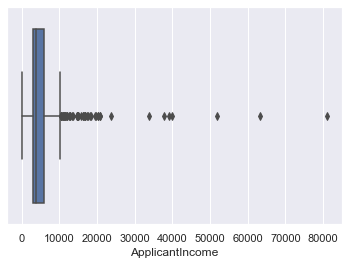

In [502]:
## Dealing with outliers 

sns.boxplot(x='ApplicantIncome',data=df)

<AxesSubplot:xlabel='CoapplicantIncome'>

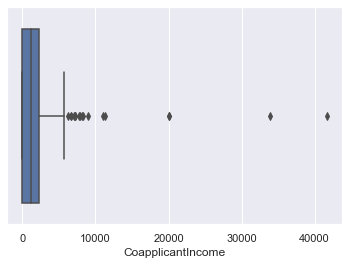

In [503]:
sns.boxplot(x='CoapplicantIncome',data=df)

<AxesSubplot:xlabel='LoanAmount'>

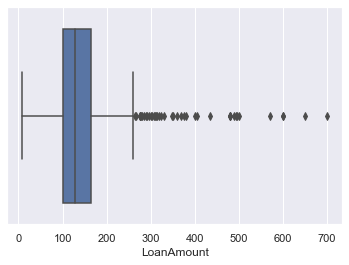

In [504]:
sns.boxplot(x='LoanAmount',data=df)

In [505]:
def impute_outlier(feat):
    sorted(feat)
    Q1,Q3=np.percentile(feat,[25,75])
    IQR=Q3-Q1
    
    low_limit=Q1-(1.5*IQR)
    up_limit=Q3+(1.5*IQR)
    
    return low_limit,up_limit

In [506]:
l,u=impute_outlier(df['ApplicantIncome'])
l1,u1=impute_outlier(df['CoapplicantIncome'])
l2,u2=impute_outlier(df['LoanAmount'])

In [507]:
df['ApplicantIncome']=np.where(
df['ApplicantIncome']>u,
    u,
    np.where(
    df['ApplicantIncome']<l,
    l,
    df['ApplicantIncome'])
)

df['CoapplicantIncome']=np.where(
df['CoapplicantIncome']>u1,
    u1,
    np.where(
    df['CoapplicantIncome']<l1,
    l1,
    df['CoapplicantIncome'])
)

df['LoanAmount']=np.where(
df['LoanAmount']>u2,
    u2,
    np.where(
    df['LoanAmount']<l2,
    l2,
    df['LoanAmount'])
)

In [508]:
df.drop('Loan_ID',axis=1,inplace=True)

## <u><strong>Feature Engineering</u></strong>

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), object(7)
memory usage: 57.7+ KB


In [510]:
## Ordinal Column
def Ordinal_encoder(x):
    if x=='Graduate':
        return 1
    else:
        return 0

df['Is_Graduate']=df['Education'].apply(Ordinal_encoder)

In [511]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Is_Graduate
0,Male,No,0,Graduate,No,5849.0,0.0,146.412162,360.0,1.0,Urban,Y,1
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.000000,360.0,1.0,Rural,N,1
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.000000,360.0,1.0,Urban,Y,1
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.000000,360.0,1.0,Urban,Y,0
4,Male,No,0,Graduate,No,6000.0,0.0,141.000000,360.0,1.0,Urban,Y,1


In [512]:
# Categorical Varibales
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

df['Loan_Status']=encoder.fit_transform(df['Loan_Status'])

df=pd.get_dummies(data=df,columns=['Gender','Dependents','Married','Self_Employed','Property_Area'],drop_first=True)


In [513]:
df.drop('Education',axis=1,inplace=True)

## <em> feature Selection </em>

In [514]:
df_1=df.copy()

In [515]:
x=df_1.drop('Loan_Status',axis=1)
y=df_1['Loan_Status']


In [516]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x,y)

In [517]:
feat_imp=pd.Series(data=mutual_info,index=x_train.columns)
feat_imp

ApplicantIncome            0.012652
CoapplicantIncome          0.000000
LoanAmount                 0.000000
Loan_Amount_Term           0.000000
Credit_History             0.165506
Is_Graduate                0.006497
Gender_Male                0.000000
Dependents_1               0.009663
Dependents_2               0.000000
Dependents_3+              0.014736
Married_Yes                0.001989
Self_Employed_Yes          0.004921
Property_Area_Semiurban    0.009429
Property_Area_Urban        0.000000
dtype: float64

<AxesSubplot:>

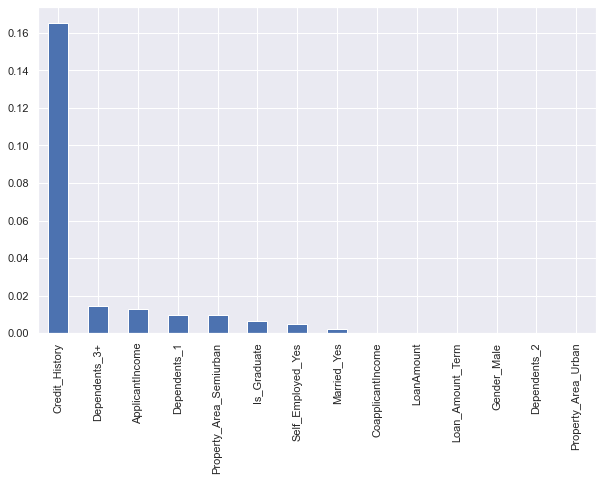

In [518]:
plt.figure(figsize=(10,6))
feat_imp.sort_values(ascending=False).plot.bar()

In [520]:
x=df.drop(['Loan_Status','Is_Graduate','Gender_Male','Married_Yes','Self_Employed_Yes'],axis=1)
y=df['Loan_Status']

from sklearn.model_selection import train_test_split 

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

##### -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## <u><strong> Machine Learning</strong></u>

In [521]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

In [522]:
def model(model):
    m=model()
    m.fit(X_train,y_train)
    y_pred=m.predict(X_test)
    return y_pred

In [523]:
## Evaluating Models
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score    

In [524]:
y_pred_lr=model(LogisticRegression)
y_pred_dt=model(DecisionTreeClassifier)
y_pred_rfc=model(RandomForestClassifier)
y_pred_svc=model(SVC)
y_pred_ada=model(AdaBoostClassifier)

C:\Users\Chauh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [525]:
### Logistic Regression
print(classification_report(y_test,y_pred_lr))
print(confusion_matrix(y_test,y_pred_lr))
print(round(accuracy_score(y_test,y_pred_lr)*100,2))

              precision    recall  f1-score   support

           0       0.91      0.39      0.55        54
           1       0.75      0.98      0.85       100

    accuracy                           0.77       154
   macro avg       0.83      0.68      0.70       154
weighted avg       0.81      0.77      0.74       154

[[21 33]
 [ 2 98]]
77.27


In [526]:
## Decision Tree
print(classification_report(y_test,y_pred_dt))
print(confusion_matrix(y_test,y_pred_dt))
print(accuracy_score(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.53      0.46      0.50        54
           1       0.73      0.78      0.75       100

    accuracy                           0.67       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154

[[25 29]
 [22 78]]
0.6688311688311688


In [527]:
## Random Forest
print(classification_report(y_test,y_pred_rfc))
print(confusion_matrix(y_test,y_pred_rfc))
print(accuracy_score(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.86      0.46      0.60        54
           1       0.77      0.96      0.85       100

    accuracy                           0.79       154
   macro avg       0.82      0.71      0.73       154
weighted avg       0.80      0.79      0.77       154

[[25 29]
 [ 4 96]]
0.7857142857142857


In [528]:
### SVC
print(classification_report(y_test,y_pred_svc))
print(confusion_matrix(y_test,y_pred_svc))
print(accuracy_score(y_test,y_pred_svc))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       100

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154

[[  0  54]
 [  0 100]]
0.6493506493506493


C:\Users\Chauh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chauh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Chauh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [529]:
## ADA Boost

print(classification_report(y_test,y_pred_ada))
print(confusion_matrix(y_test,y_pred_ada))
print(accuracy_score(y_test,y_pred_ada))

              precision    recall  f1-score   support

           0       0.79      0.41      0.54        54
           1       0.75      0.94      0.83       100

    accuracy                           0.75       154
   macro avg       0.77      0.67      0.68       154
weighted avg       0.76      0.75      0.73       154

[[22 32]
 [ 6 94]]
0.7532467532467533


In [532]:
rfc=RandomForestClassifier()

In [533]:
import pickle

In [534]:
pickle.dump(rfc,open('LoanPrediciton.pkl','wb'))